<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">IRIS Flower Classification using TensorFlow</p>


![image.png](https://miro.medium.com/v2/resize:fit:1200/1*S2GII1ul0JjbZ0YaFvDByw.jpeg)

<p style="color:  #8a4baf; font-size: 20px; padding: 20px; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">The Iris dataset is a well-known and frequently used benchmark in the field of machine learning and statistics. It is a classic dataset that contains a collection of measurements of various characteristics from three different types of iris flowers: Setosa, Versicolor, and Virginica. This dataset serves as a fundamental example for exploring and applying data analysis, classification, and pattern recognition techniques. Due to its simplicity and clarity, the Iris dataset continues to be a cornerstone for both beginners and experienced practitioners, providing insights into data exploration and algorithm evaluation.</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()       

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.groupby("species").agg(["min","max","std","mean"]) 

sepal_length                       sepal_width                 \
                    min  max       std   mean         min  max       std   
species                                                                    
setosa              4.3  5.8  0.352490  5.006         2.3  4.4  0.379064   
versicolor          4.9  7.0  0.516171  5.936         2.0  3.4  0.313798   
virginica           4.9  7.9  0.635880  6.588         2.2  3.8  0.322497   

                  petal_length                       petal_width       \
             mean          min  max       std   mean         min  max   
species                                                                 
setosa      3.428          1.0  1.9  0.173664  1.462         0.1  0.6   
versicolor  2.770          3.0  5.1  0.469911  4.260         1.0  1.8   
virginica   2.974          4.5  6.9  0.551895  5.552         1.4  2.5   

                             
                 std   mean  
species                      
setosa      0.105386  0.246  
versicolor  0.197753  1.326  
virginica   0.274650  2.026

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


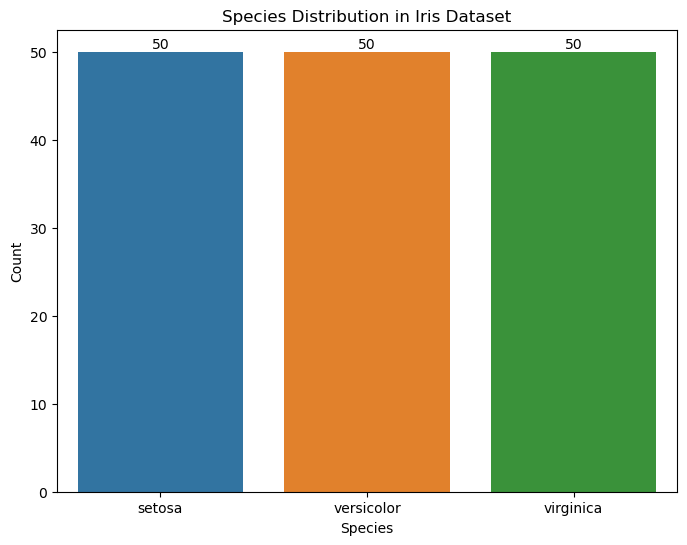

In [8]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='species')
ax.bar_label(ax.containers[0])
plt.title('Species Distribution in Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2021/10/iris-flower.webp)

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

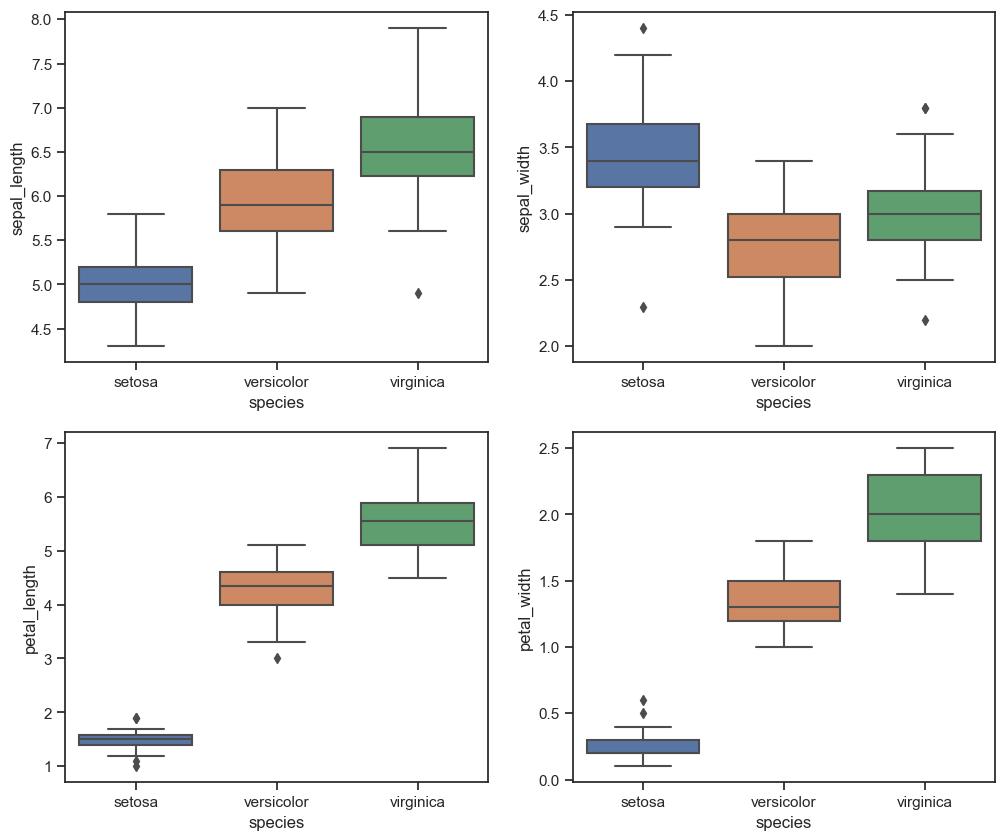

In [9]:
sns.set(style = "ticks")
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)                                                 
sns.boxplot(x = "species", y = "sepal_length", data = df)
plt.subplot(2,2,2)
sns.boxplot(x = "species", y = "sepal_width", data = df)
plt.subplot(2,2,3)
sns.boxplot(x = "species", y = "petal_length", data = df)
plt.subplot(2,2,4)
sns.boxplot(x = "species", y = "petal_width", data = df)
plt.show()

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


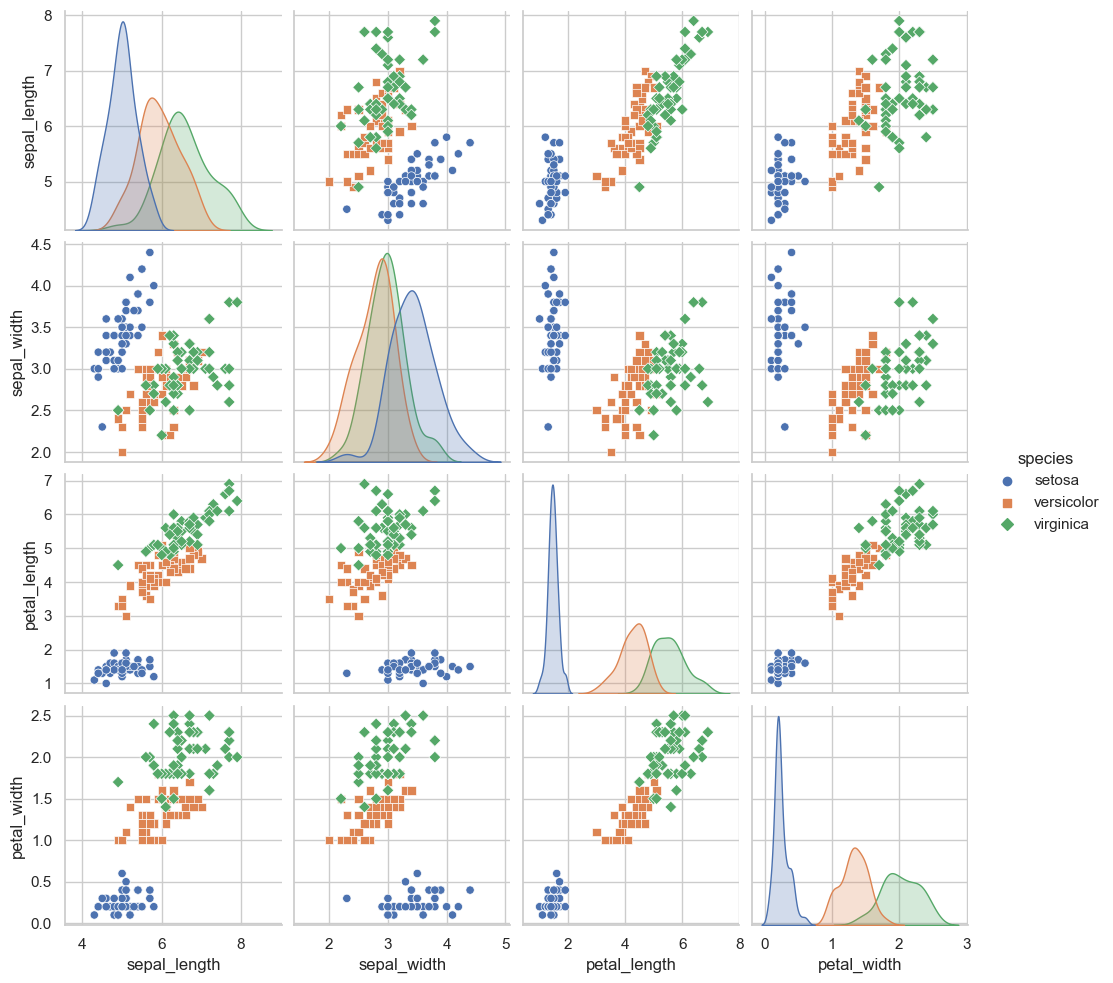

In [10]:
sns.set(style="whitegrid")

# Plot the distributions of features for each species
sns.pairplot(df, hue='species', markers=["o", "s", "D"], diag_kind="kde")
plt.show()

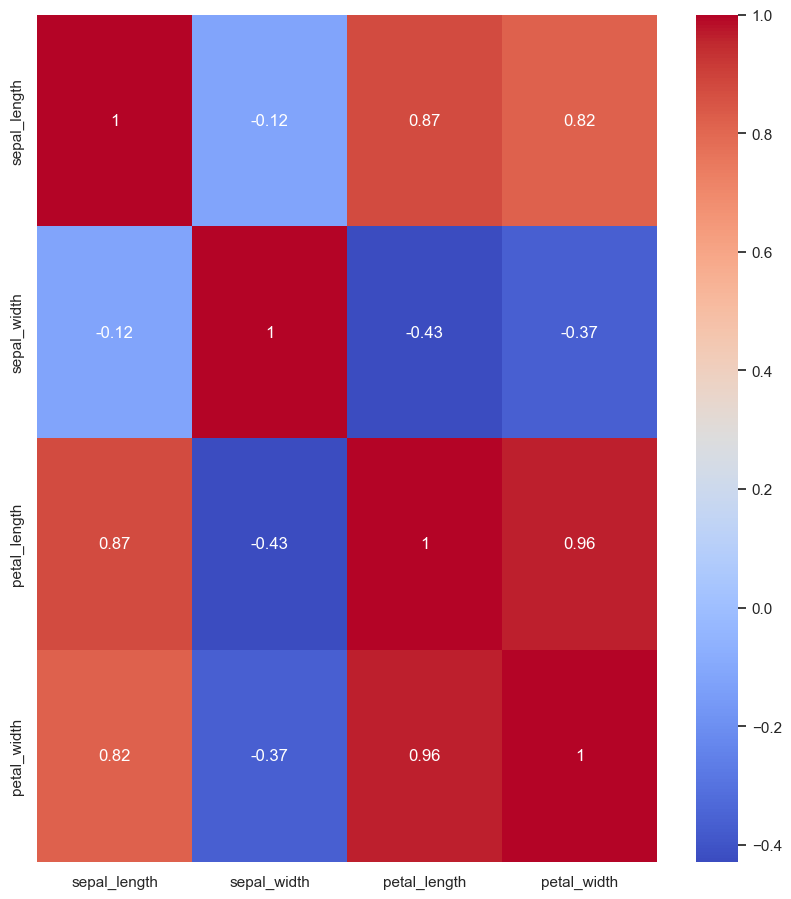

In [12]:
plt.figure(figsize = (10,11))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, cmap = "coolwarm")
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

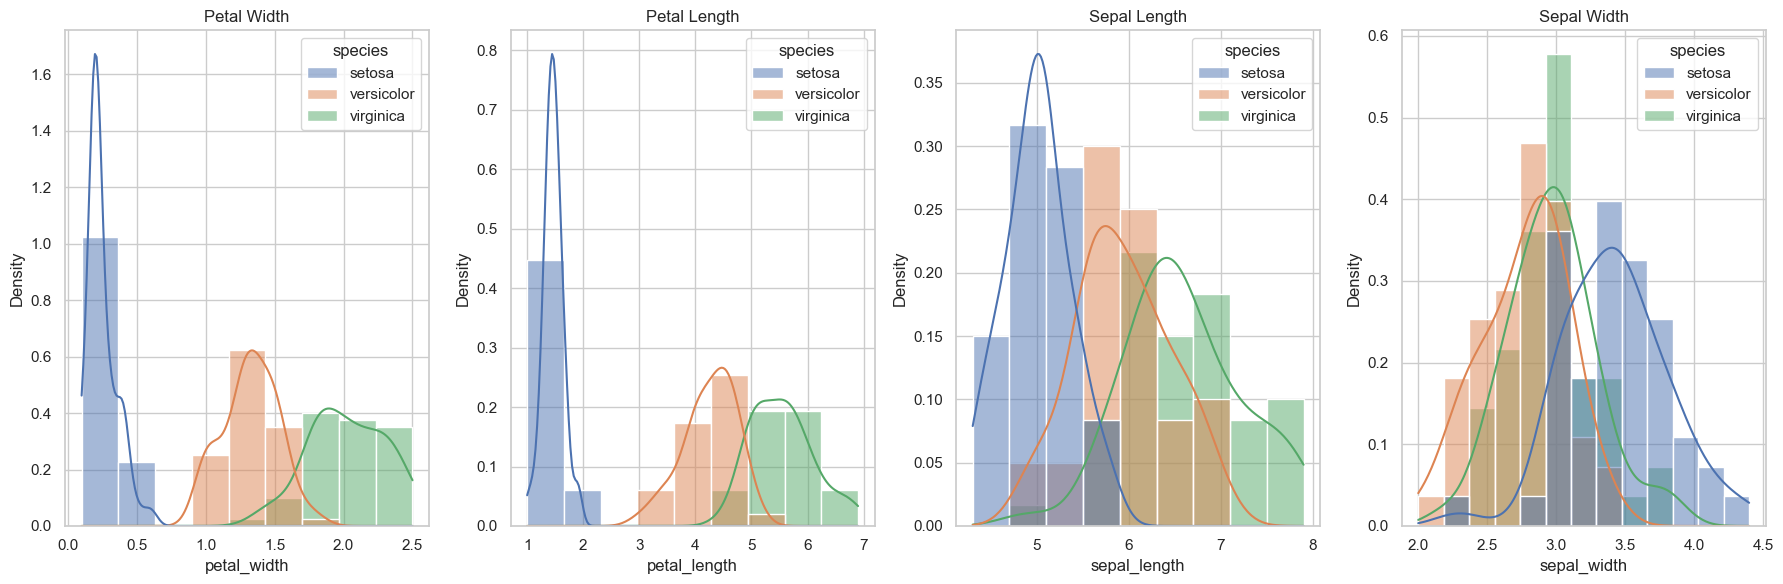

In [14]:
plt.figure(figsize=(18, 6))

# Petal width
plt.subplot(1, 4, 1)
sns.histplot(data=df, x="petal_width", hue="species", stat="density", kde=True)
plt.title("Petal Width")

# Petal length
plt.subplot(1, 4, 2)
sns.histplot(data=df, x="petal_length", hue="species", stat="density", kde=True)
plt.title("Petal Length")

# Sepal length
plt.subplot(1, 4, 3)
sns.histplot(data=df, x="sepal_length", hue="species", stat="density", kde=True)
plt.title("Sepal Length")

# Sepal width
plt.subplot(1, 4, 4)
sns.histplot(data=df, x="sepal_width", hue="species", stat="density", kde=True)
plt.title("Sepal Width")

plt.tight_layout()
plt.show()

### Results

* While we have four numerical columns, there is only one categorical column (flower species) that we aim to analyze.

* The dataset is balanced, meaning there are equal records for all three species.

* There are no missing values in our dataset.

* Based on the boxplot, we can see that there is no serious issue with outliers.

* There is a strong correlation between petal width and petal length.

* The Setosa species is the easiest to distinguish due to its smaller size.

* Versicolor and Virginica species are often confused and can sometimes be difficult to separate. However, Versicolor generally has more average-sized dimensions, whereas Virginica tends to have larger dimensions.

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit_transform(df["species"])

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
df["species"] = le.fit_transform(df["species"])

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [18]:
df["species"].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

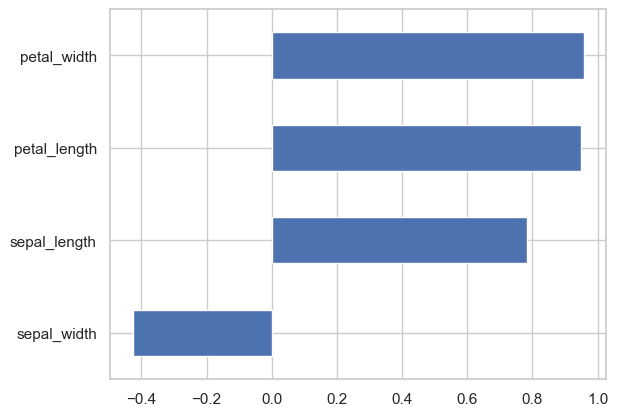

In [19]:
df.corr()['species'][:-1].sort_values().plot.barh();

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train-Test Split

In [21]:
X = df .drop("species", axis = 1)
y = df["species"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

## ANN Model

#### IMPORTANT:
* If the target variables in your dataset are in the form of class numbers, meaning each class is represented by a number, it is more appropriate to use the **sparse_categorical_crossentropy** loss function. If one-hot encoding is used, then **categorical_crossentropy** is preferred. Due to the nature of our target variable, we will choose the sparse_categorical_crossentropy loss function.
* If we were to use categorical_crossentropy in our model, we would first need to import **from tensorflow.keras.utils import to_categorical**, and then apply the following on our `y` data in sequence: **y_train_encoded = to_categorical(y_train)** and **y_test_encoded = to_categorical(y_test)**.

In [25]:
# Build the model
model = Sequential([
    Dense(units=10, activation="relu"),
    Dense(units=10, activation="relu"),             # When we reduce the number of neurons, it is necessary to increase the number of epochs.


    Dense(units=3, activation="softmax")
])

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=5, epochs=200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3423 - loss: 1.0297 - val_accuracy: 0.3333 - val_loss: 0.9844
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4942 - loss: 0.9775 - val_accuracy: 0.6000 - val_loss: 0.9332
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.9247 - val_accuracy: 0.7000 - val_loss: 0.8770
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.8716 - val_accuracy: 0.7667 - val_loss: 0.8228
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7039 - loss: 0.8104 - val_accuracy: 0.7333 - val_loss: 0.7761
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6825 - loss: 0.7584 - val_accuracy: 0.7000 - val_loss: 0.7226
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - loss: 0.7178 - val_accuracy: 0.7000 - val_loss: 0.6783
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.6597 - val_accuracy: 0.7000 - v

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9379 - loss: 0.1461 - val_accuracy: 0.9333 - val_loss: 0.1503
Epoch 52/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9519 - loss: 0.1356 - val_accuracy: 0.9667 - val_loss: 0.1551
Epoch 53/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.1334 - val_accuracy: 0.9667 - val_loss: 0.1457
Epoch 54/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.1184 - val_accuracy: 0.9667 - val_loss: 0.1438
Epoch 55/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9597 - loss: 0.1294 - val_accuracy: 0.9333 - val_loss: 0.1405
Epoch 56/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.1192 - val_accuracy: 0.9667 - val_loss: 0.1438
Epoch 57/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.1187 - val_accuracy: 0.9333 - val_loss: 0.1366
Epoch 58/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.1360 - val_accuracy: 0.9667 - val_lo

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9792 - loss: 0.0627 - val_accuracy: 0.9667 - val_loss: 0.0911
Epoch 102/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.1017 - val_accuracy: 0.9667 - val_loss: 0.0950
Epoch 103/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9592 - loss: 0.0868 - val_accuracy: 0.9667 - val_loss: 0.0912
Epoch 104/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9641 - loss: 0.0830 - val_accuracy: 0.9667 - val_loss: 0.0899
Epoch 105/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9472 - loss: 0.0994 - val_accuracy: 0.9667 - val_loss: 0.0950
Epoch 106/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0798 - val_accuracy: 0.9667 - val_loss: 0.0882
Epoch 107/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.0871 - val_accuracy: 0.9667 - val_loss: 0.0881
Epoch 108/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.0652 - val_accuracy: 0.9667 -

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9806 - loss: 0.0544 - val_accuracy: 0.9667 - val_loss: 0.0695
Epoch 152/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9777 - loss: 0.0587 - val_accuracy: 0.9667 - val_loss: 0.0734
Epoch 153/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.0623 - val_accuracy: 0.9667 - val_loss: 0.0707
Epoch 154/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9705 - loss: 0.0644 - val_accuracy: 0.9667 - val_loss: 0.0702
Epoch 155/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9601 - loss: 0.0966 - val_accuracy: 0.9667 - val_loss: 0.0719
Epoch 156/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.0508 - val_accuracy: 0.9667 - val_loss: 0.0695
Epoch 157/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9751 - loss: 0.0568 - val_accuracy: 0.9667 - val_loss: 0.0690
Epoch 158/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0526 - val_accuracy: 0.9667 -

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (5, 10)                     │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (5, 10)                     │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (5, 3)                      │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

* Since our data is not large or complex, we did not apply Dropout and Early Stopping methods.

In [27]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [28]:
eval_metric(model, X_train, y_train, X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Set:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Train Set:
[[40  0  0]
 [ 0 40  1]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      0.98      0.98        41
           2       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

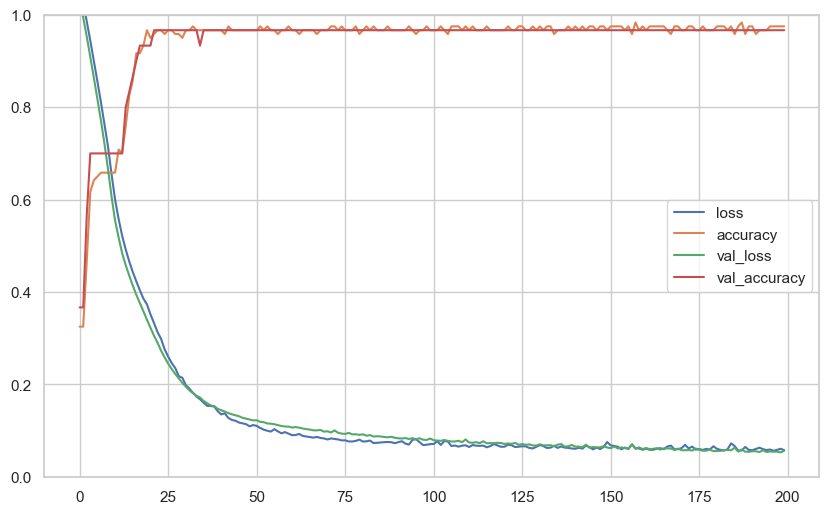

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


Accuracy during Training :
------------------------------------


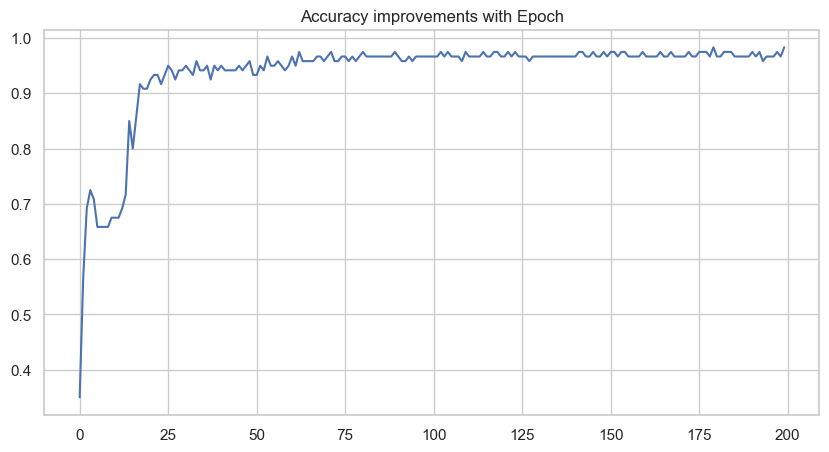

In [29]:
# let's see the change in accuracy

print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

## Final Model and Model Deployment

In [30]:
X.shape

(150, 4)

In [31]:
y.shape

(150,)

In [32]:
scaler = MinMaxScaler().fit(X)

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [33]:
# save the MinMaxScaler scaling operation
pickle.dump(scaler, open("scaler_iris", 'wb'))

In [34]:
X_scaled = scaler.transform(X)

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [35]:
final_model = Sequential([
            Dense(units=10, activation="relu"),
            Dense(units=10, activation="relu"),             # had to increase the number of epoch as the number of neurons are less
            Dense(units=3, activation="softmax")
    ])

opt = Adam(learning_rate=0.001)

final_model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

final_model.fit(x=X_scaled, y=y, batch_size=5, epochs=200) 

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3572 - loss: 1.0904   
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.6142 - loss: 0.9922
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5034 - loss: 0.9507
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6263 - loss: 0.8993
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.6441 - loss: 0.8515
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6471 - loss: 0.8041
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.6954 - loss: 0.7412
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.6864 - loss: 0.7054
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7167 - loss: 0.6533
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.7237 - loss: 0.6010
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.7086 - loss: 0.5791
Epoch 12/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 878us

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.9862 - loss: 0.0891
Epoch 69/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.9704 - loss: 0.1106
Epoch 70/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9306 - loss: 0.1376
Epoch 71/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9564 - loss: 0.1100
Epoch 72/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.9802 - loss: 0.0849
Epoch 73/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.9540 - loss: 0.1042
Epoch 74/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9746 - loss: 0.0937
Epoch 75/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9556 - loss: 0.1130
Epoch 76/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.9343 - loss: 0.1312
Epoch 77/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9504 - loss: 0.1191
Epoch 78/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9802 - loss: 0.0785
Epoch 79/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/st

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9721 - loss: 0.0577
Epoch 136/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9679 - loss: 0.0544
Epoch 137/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9773 - loss: 0.0535
Epoch 138/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9645 - loss: 0.0795
Epoch 139/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.9713 - loss: 0.0616
Epoch 140/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9639 - loss: 0.0738
Epoch 141/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9828 - loss: 0.0478
Epoch 142/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9743 - loss: 0.0694
Epoch 143/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9922 - loss: 0.0572
Epoch 144/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.0677 
Epoch 145/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9598 - loss: 0.0711
Epoch 146/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [36]:
final_model.save('final_model_ANN_iris.h5') 

### Prediction with the saved model

In [37]:
# creating sample data manually
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]}

sample_ann = pd.DataFrame(my_dict)
sample_ann

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


In [38]:
# loading the min-max scaler files
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [39]:
sample_scaled = scaler_iris.transform(sample_ann)
sample_scaled

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([[0.05555556, 0.08333333, 0.05084746, 0.04166667],
       [0.41666667, 0.41666667, 0.55932203, 0.5       ],
       [0.88888889, 0.91666667, 0.93220339, 0.91666667]])

In [40]:
# load the pretrained model

from tensorflow.keras.models import load_model

In [41]:
final_model = load_model('final_model_ANN_iris.h5')

In [42]:
final_model.predict(sample_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[9.9741203e-01, 2.5880376e-03, 3.9310569e-12],
       [1.4515627e-05, 9.9873692e-01, 1.2486171e-03],
       [1.2767789e-15, 3.9580585e-03, 9.9604189e-01]], dtype=float32)

In [43]:
y_pred_probabilities = final_model.predict(sample_scaled)
y_pred = y_pred_probabilities.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [44]:
sample_ann["pred"] = y_pred
sample_ann

,sepal_length,sepal_width,petal_length,petal_width,pred
0,4.5,2.2,1.3,0.2,0
1,5.8,3.0,4.3,1.3,1
2,7.5,4.2,6.5,2.3,2


In [45]:
predictions = final_model.predict(sample_scaled)

normalized_predictions = tf.nn.softmax(predictions, axis=-1).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [46]:
normalized_predictions

array([[0.5751684 , 0.21269068, 0.21214095],
       [0.21204205, 0.57565403, 0.21230388],
       [0.21224621, 0.21308793, 0.57466584]], dtype=float32)

In [47]:
sample_ann["pred_proba_setosa"] = normalized_predictions[:,0]
sample_ann["pred_proba_versicolor"] = normalized_predictions[:,1]
sample_ann["pred_proba_virginica"] = normalized_predictions[:,2]
sample_ann

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.575168,0.212691,0.212141
1,5.8,3.0,4.3,1.3,1,0.212042,0.575654,0.212304
2,7.5,4.2,6.5,2.3,2,0.212246,0.213088,0.574666


## xgboost Model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
X_train.shape

(120, 4)

In [50]:
import xgboost as xgb
xgb_cls = xgb.XGBClassifier(objective = "multiclass:softmax", num_class = 3)

In [51]:
xgb_cls.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [52]:
preds = xgb_cls.predict(X_test)

In [53]:
preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [54]:
np.array(y_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [55]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [56]:
eval_metric(xgb_cls, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

In [57]:
from sklearn.model_selection import cross_validate

model = xgb.XGBClassifier(objective = "multiclass:softmax", num_class = 3)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                            'f1_weighted'], cv = 20)
                                                        
df_scores = pd.DataFrame(scores, index = range(1, 21))
df_scores.mean()[2:]

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

test_accuracy              0.933333
test_precision_weighted    0.941667
test_recall_weighted       0.933333
test_f1_weighted           0.927222
dtype: float64

## Final Model and Model Deployment

In [58]:
final_model = xgb.XGBClassifier(objective = "multiclass:softmax", num_class = 3).fit(X, y)

In [59]:
pickle.dump(final_model, open("final_model_xgboost_iris", 'wb'))

### Prediction with  the saved model

In [60]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]}
sample_xgboost = pd.DataFrame(my_dict)
sample_xgboost

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


In [61]:
final_model = pickle.load(open("final_model_xgboost_iris", "rb"))

In [62]:
predictions = final_model.predict(sample_xgboost)
predictions_proba = final_model.predict_proba(sample_xgboost)

In [63]:
predictions_proba

array([[9.9144393e-01, 4.8739160e-03, 3.6821908e-03],
       [4.5280508e-03, 9.9358338e-01, 1.8885131e-03],
       [4.8400337e-04, 1.2608367e-03, 9.9825519e-01]], dtype=float32)

In [64]:
sample_xgboost["pred"] = predictions
sample_xgboost["pred_proba_setosa"] = predictions_proba[:,0]
sample_xgboost["pred_proba_versicolor"] = predictions_proba[:,1]
sample_xgboost["pred_proba_virginica"] = predictions_proba[:,2]
sample_xgboost

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.991444,0.004874,0.003682
1,5.8,3.0,4.3,1.3,1,0.004528,0.993583,0.001889
2,7.5,4.2,6.5,2.3,2,0.000484,0.001261,0.998255


In [65]:
sample_ann         # comparing the above XGB and below ANN results

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.575168,0.212691,0.212141
1,5.8,3.0,4.3,1.3,1,0.212042,0.575654,0.212304
2,7.5,4.2,6.5,2.3,2,0.212246,0.213088,0.574666


## Alternative Tries

* At this stage, we tried using **categorical_crossentropy** as the loss function instead of **sparse_categorical_crossentropy** and attempted to compare our results by adjusting various parameters.

### categorical_crossentropy usage

In [67]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
iris_data = load_iris() # load the iris dataset
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)
# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())
# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)
# Test on unseen data
results = model.evaluate(test_x, test_y)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 


C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                          │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
24/24 - 1s - 29ms/step - accuracy: 0.6500 - loss: 0.9924
Epoch 2/200
24/24 - 0s - 2ms/step - accuracy: 0.6500 - loss: 0.9091
Epoch 3/200
24/24 - 0s - 1ms/step - accuracy: 0.6500 - loss: 0.8302
Epoch 4/200
24/24 - 0s - 1ms/step - accuracy: 0.6500 - loss: 0.7534
Epoch 5/200
24/24 - 0s - 2ms/step - accuracy: 0.6500 - loss: 0.6873
Epoch 6/200
24/24 - 0s - 1ms/step - accuracy: 0.8333 - loss: 0.6006
Epoch 7/200
24/24 - 0s - 2ms/step - accuracy: 0.9500 - loss: 0.5201
Epoch 8/200
24/24 - 0s - 1ms/step - accuracy: 0.9667 - loss: 0.4752
Epoch 9/200
24/24 - 0s - 1ms/step - accuracy: 0.9500 - loss: 0.4405
Epoch 10/200
24/24 - 0s - 1ms/step - accuracy: 0.9583 - loss: 0.4163
Epoch 11/200
24/24 - 0s - 1ms/step - accuracy: 0.9583 - loss: 0.3915
Epoch 12/200
24/24 - 0s - 1ms/step - accuracy: 0.9750 - loss: 0.3704
Epoch 13/200
24/24 - 0s - 2ms/step - accuracy: 0.9667 - loss: 0.3574
Epoch 14/200
24/24 - 0s - 1ms/step - accuracy: 0.9667 - loss: 0.3384
Epoch 15/200
24/24 - 0s - 2ms/step - 

Epoch 120/200
24/24 - 0s - 1ms/step - accuracy: 0.9667 - loss: 0.0749
Epoch 121/200
24/24 - 0s - 1ms/step - accuracy: 0.9750 - loss: 0.0787
Epoch 122/200
24/24 - 0s - 1ms/step - accuracy: 0.9833 - loss: 0.0780
Epoch 123/200
24/24 - 0s - 1ms/step - accuracy: 0.9583 - loss: 0.0784
Epoch 124/200
24/24 - 0s - 2ms/step - accuracy: 0.9667 - loss: 0.0757
Epoch 125/200
24/24 - 0s - 1ms/step - accuracy: 0.9750 - loss: 0.0753
Epoch 126/200
24/24 - 0s - 1ms/step - accuracy: 0.9750 - loss: 0.0752
Epoch 127/200
24/24 - 0s - 2ms/step - accuracy: 0.9583 - loss: 0.0853
Epoch 128/200
24/24 - 0s - 1ms/step - accuracy: 0.9833 - loss: 0.0725
Epoch 129/200
24/24 - 0s - 2ms/step - accuracy: 0.9583 - loss: 0.0935
Epoch 130/200
24/24 - 0s - 1ms/step - accuracy: 0.9750 - loss: 0.0793
Epoch 131/200
24/24 - 0s - 2ms/step - accuracy: 0.9833 - loss: 0.0729
Epoch 132/200
24/24 - 0s - 1ms/step - accuracy: 0.9583 - loss: 0.0835
Epoch 133/200
24/24 - 0s - 1ms/step - accuracy: 0.9667 - loss: 0.0836
Epoch 134/200
24/24 

In [68]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                          │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

* Since our data is not large or complex, we did not apply Dropout and Early Stopping methods.

In [69]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [70]:
eval_metric(model, X_train, y_train, X_test, y_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepWARNING:tensorflow:5 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A91A04B2E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Test Set:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train Set:
[[40  0  0]
 [ 0 40  1]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      0.98      0.98        41
           2       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

In [71]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]}

sample_ann = pd.DataFrame(my_dict)
sample_scaled = scaler.transform(sample_ann)

C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jawed\anaconda3\envs\Data\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [72]:
sample_scaled

array([[0.05555556, 0.08333333, 0.05084746, 0.04166667],
       [0.41666667, 0.41666667, 0.55932203, 0.5       ],
       [0.88888889, 0.91666667, 0.93220339, 0.91666667]])

In [73]:
predictions = model.predict(sample_scaled)

normalized_predictions = tf.nn.softmax(predictions, axis=-1).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [74]:
normalized_predictions

array([[0.50648165, 0.26933217, 0.22418624],
       [0.29181322, 0.477323  , 0.23086369],
       [0.23158935, 0.5304742 , 0.23793645]], dtype=float32)

### Hyperparameter Tuning results

* 3 hidden 16,8,4 - batch size 5 - accuracy 0.70 - epoch 200
* 3 hidden 16,8,4 - batch size 30 - accuracy 0.96 -  epoch 200
* 2 hidden 16,8  - batch size 30 - accuracy 0.92 -  epoch 200
* 2 hidden 16,8  - batch size 20 - accuracy 0.96 - epoch 200
* 2 hidden 16,8  - batch size 20 - accuracy 0.96 - epoch 100
* 2 hidden 8,4  - batch size 5 - accuracy 0.96  - epoch 100 -  learning_rate=0.001
* 2 hidden 8,4  - batch size 5 - accuracy 1.0 -  epoch 100 - learning_rate=0.003 
* 2 hidden 8,4  - batch size 10 - accuracy 0.96  - epoch 100 - learning_rate=0.003 - epoch 150 same result
* 2 hidden 8,4  - batch size 5 - accuracy 1.0 -  epoch 150  - learning_rate=0.003  -  test size 0.1   -  loss 0,0336     **the 1st choice
* 2 hidden 8,4  - batch size 20 - accuracy 1.0  - epoch 150 - learning_rate=0.003 
* 2 hidden 8,4  - batch size 30 - accuracy 0.96 - epoch 150 - learning_rate=0.003 
* 2 hidden 8,4  - batch size 40 - accuracy 0.96 -  epoch 200 - learning_rate=0.003
* 2 hidden 64,64  - batch size 14 - accuracy 0.96 -  epoch 20 - learning_rate=0.003 
* 2 hidden 64,64  - batch size 10 - accuracy 0.93  - epoch 30 - learning_rate=0.003 
* 2 hidden 64,64  - batch size 10 - accuracy 0.93 -  epoch 30 - learning_rate=0.008  - loss 0,0545
* 2 hidden 128,128  - batch size 10 - accuracy 0.96 - epoch 30 - learning_rate=0.008  - loss 0,0460
* 2 hidden 128,128  - batch size 20 - accuracy 0.96  - epoch 50 - learning_rate=0.008  - loss 0,0428
* 2 hidden 128,128  - batch size 30 - accuracy 1.0 - epoch 70 - learning_rate=0.008  - loss 0,0336
* 2 hidden 128,128  - batch size 30 - accuracy 1.0 -  epoch 80 - learning_rate=0.01  - loss 0,0412
* 2 hidden 128,128  - batch size 40 - accuracy 1.0  - epoch 80 - learning_rate=0.01  - loss 0,0412
* 2 hidden 128,128  - batch size 14 - accuracy 0.96 - epoch 20 - learning_rate=0.003  

## Result

* In general, we achieved higher scores with configurations involving 2 hidden layers.
* When determining the number of neurons, we encountered two options:
  - If we selected a low number of neurons (like 16, 8, 4), we achieved scores between 0.96 and 1.00 by trying 100-200 epochs with batch sizes between 5-40.
  - If we selected a high number of neurons (like 64, 128), we achieved scores between 0.96 and 1.00 by trying 20-100 epochs with batch sizes between 10-40.
  
* Conclusions we drew from this:
    - Lower epoch counts are sufficient when using a high number of neurons.
    - High epoch counts are not necessary when choosing a smaller batch size (compared to higher batch sizes).
    - In cases where the data is limited, even though there are many alternative parameter settings in an Artificial Neural Network (ANN), the results do not vary significantly. In fact, compared to the XGBoost model, ANN was found to make decisions with a lower probability in predicting flower species. For example, while XGBoost made decisions with a high probability (0.99) in predicting flower species, ANN, despite trying various parameter settings, could only predict with a maximum probability of 0.58.

In [75]:
sample_xgboost     # the predictions of xgboost model

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,0,0.991444,0.004874,0.003682
1,5.8,3.0,4.3,1.3,1,0.004528,0.993583,0.001889
2,7.5,4.2,6.5,2.3,2,0.000484,0.001261,0.998255


In [76]:
sample_ann       # the predictions of ANN model

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


# Streamlit 

### EDA - Prediction (XGBOOST - ANN)

In [84]:
%%writefile iris_app.py
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from keras import models
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

iris = pd.read_csv("iris.csv")

st.markdown(
    """
    <style>
    .stApp {
        background-color: #e6dd27;  /* Dark yellow color */
    </style>
    """,
    unsafe_allow_html=True
)


# Add tabs
selected_tab = st.sidebar.selectbox("Select Page", ["EDA", "Prediction"])

if selected_tab == "EDA":
   
    #st.sidebar.header('User Input Parameters for EDA')
    # Add code related to EDA here, such as data visualizations, etc.
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Exploring Data Analysis (EDA)</p>', unsafe_allow_html=True)
    st.image("https://data-flair.training/blogs/wp-content/uploads/sites/2/2021/10/iris-flower.webp", use_column_width=True)
    
    plt.figure(figsize=(8, 6))
    ax=sns.countplot(data=iris, x='species')
    ax.bar_label(ax.containers[0])
    plt.title('Species Distribution in Iris Dataset')
    plt.xlabel('Species')
    plt.ylabel('Count')
    st.pyplot(plt)
    
    
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Statistical Properties of the Features</p>', unsafe_allow_html=True)
    st.dataframe(iris.describe())
    
    
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Plot the Distributions of Features For Each Species</p>', unsafe_allow_html=True)
    sns.set(style="whitegrid")
    sns.pairplot(iris, hue='species', markers=["o", "s", "D"], diag_kind="kde")
    st.pyplot(plt)
    
    
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Status of Outliers</p>', unsafe_allow_html=True)
    sns.set(style = "ticks")
    plt.figure(figsize = (12,10))

    plt.subplot(2,2,1)                                                 
    sns.boxplot(x = "species", y = "sepal_length", data = iris)
    plt.subplot(2,2,2)
    sns.boxplot(x = "species", y = "sepal_width", data = iris)
    plt.subplot(2,2,3)
    sns.boxplot(x = "species", y = "petal_length", data = iris)
    plt.subplot(2,2,4)
    sns.boxplot(x = "species", y = "petal_width", data = iris)
    st.pyplot(plt)
    
    
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Correlation Table</p>', unsafe_allow_html=True)
    plt.figure(figsize = (10,11))
    sns.heatmap(iris.corr(), annot = True, cmap = "coolwarm")
    st.pyplot(plt)
    
elif selected_tab == "Prediction":
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">IRIS Flower Classification using TensorFlow</p>', unsafe_allow_html=True)
    st.image("https://miro.medium.com/v2/resize:fit:1200/1*S2GII1ul0JjbZ0YaFvDByw.jpeg", use_column_width=True)

    # Center the text
    st.markdown('<p style="text-align: center; font-size: 20px;">This app predicts the <strong>Iris flower</strong> type!</p>', unsafe_allow_html=True)
     
    model_option = st.sidebar.selectbox("Select Model", ["XGBoost", "Artificial Neural Network"])
    # Content for the prediction tab
    st.sidebar.header('User Input Parameters for Prediction')
    
    def user_input_features():
        sepal_length = st.sidebar.slider('Sepal length', 4.3, 7.9, 5.4, step=0.1)
        sepal_width = st.sidebar.slider('Sepal width', 2.0, 4.4, 3.4)
        petal_length = st.sidebar.slider('Petal length', 1.0, 6.9, 1.3)
        petal_width = st.sidebar.slider('Petal width', 0.1, 2.5, 0.2)
        data = {'sepal_length': sepal_length,
                'sepal_width': sepal_width,
                'petal_length': petal_length,
                'petal_width': petal_width}
        features = pd.DataFrame(data, index=[0])
        return features
    
    df = user_input_features()

    # Load local Iris dataset
    #iris = pd.read_csv("iris.csv")

    final_xgboost = pickle.load(open("final_model_xgboost_iris", "rb"))
    final_ann = load_model('final_model_ANN_iris.h5')
    scaler_iris = pickle.load(open("scaler_iris", "rb"))

    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">User Input parameters</p>', unsafe_allow_html=True)
    st.dataframe(df.style.format("{:.2f}"))


    if model_option == "XGBoost":
        prediction = final_xgboost.predict(df)
        prediction_proba = final_xgboost.predict_proba(df)
        
    elif model_option == "Artificial Neural Network":     
        df_scaled = scaler_iris.transform(df)
        y_pred_probabilities = final_ann.predict(df.values)
        prediction = y_pred_probabilities.argmax(axis=1)
        prediction_proba = tf.nn.softmax(y_pred_probabilities, axis=1).numpy()

    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Class labels and their corresponding index number</p>', unsafe_allow_html=True)
    st.write(iris.species.value_counts().index)
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Prediction Probability</p>', unsafe_allow_html=True)
    st.write(prediction_proba)
    st.markdown('<p style="background-color: #8a4baf; color: white; font-size: 20px; padding: 10px; border-radius: 5px; text-align: left; box-shadow: 0px 2px 3px rgba(0, 0, 0, 0.1);">Prediction</p>', unsafe_allow_html=True)

    # Create a two-column layout
    col1, col2 = st.columns([2, 1])  # Width of the first column is 2, the second is 1

    # Left column: Text
    with col1:
        st.write("<p style='color:red; font-size:25px; text-align: center; margin-top: 150px;'>Prediction: {}</p>".format(", ".join(iris.species.value_counts().index)))


Overwriting iris_app.py


In [85]:
!streamlit run iris_app.py

^C
